# HW 1 - PROGRAMMING EXERCISES - Part I. The Housing Prices

## Import Packages

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LassoCV
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm # for test use, will not used for OLS!!!

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset and Inspect Data

In [2]:
# load the Housing Prices dataset
df_test  = pd.read_csv("test.csv");
df_train = pd.read_csv("train.csv");

# check data
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# check data
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# inspect data
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
# basic insepction 
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

## Continuous and Categorical Features 

* 3 examples of continuous features: LotArea, GrLivArea, TotalBsmtSF
* 3 examples of categorical features: LotShape, BldgType, MasVnrType

### Histogram of TotalBsmtSF - Continuous

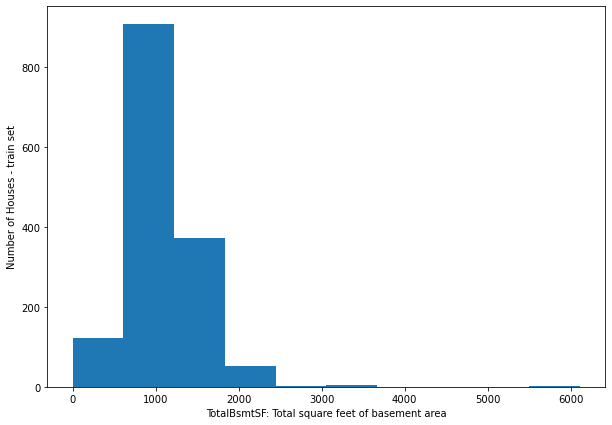

In [6]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_train['TotalBsmtSF'])

# Adding extra features   
plt.xlabel("TotalBsmtSF: Total square feet of basement area")
plt.ylabel("Number of Houses - train set")
plt.savefig("hist_cont_TotalBsmtSF") # save pics

### Histogram of LotShape - Categorical

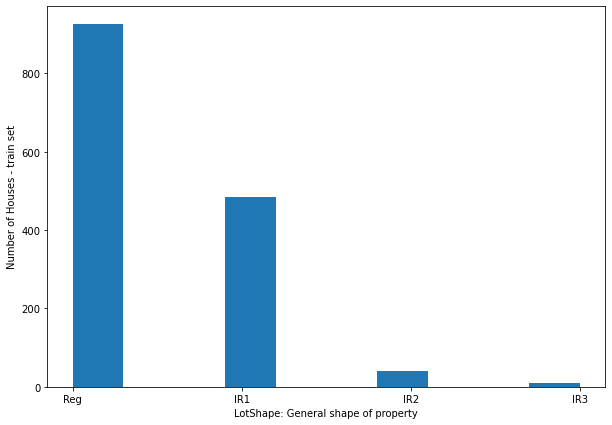

In [7]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_train['LotShape'])

# Adding extra features   
plt.xlabel("LotShape: General shape of property")
plt.ylabel("Number of Houses - train set")
plt.savefig("hist_cat_LotShape") # save pics

## Preprocess Data

In this section, steps of pre-processing include preparing the datasets, dealing with missing values, normalizing numerical values, dealing with categorical values.
### Prepare the Datasets
To pre-process data, I will concatenate train and test to facilitate the process. In this way, I can deal with both datasets at the same time.

In [8]:
# concat train and test for data processing
df = pd.concat([df_train, df_test], ignore_index = True);
# drop the target variable saleprice in place
target = df_train['SalePrice']

### Normalize Data
Let's inspect the distribution of SalePrice first.

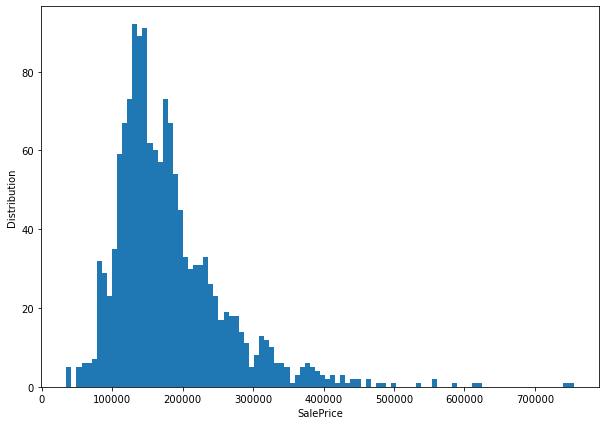

In [9]:
# draw the distribution of salesprice
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(target, bins=100)

# Adding extra features   
plt.xlabel("SalePrice")
plt.ylabel("Distribution")
plt.savefig("dist_sale_price") # save pics

From the fig, We can see that the distribution is skewed. I will take the log-transform of SalePrice to remove this skewness.

In [10]:
y_train  = np.log1p(df_train["SalePrice"]) # get the log of sale price
df.drop(['SalePrice'], axis = 1, inplace = True)
# get the dimensionality after the above steps
df.shape

(2919, 80)

### Categorize data
Different methods of pre-processing will be applied for categorical data and numerical data. So I'll classify data into these two types first for future processing. 

In [11]:
# get all the categorical columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()
# dataframe with categorical features
data_cat = df[cat_col]
data_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# dataframe with numerical features
data_num = df.drop(cat_col, axis = 1)
data_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### Deal with missing value in Categorical Columns
I'll figure out the number of missing value for each column, check out the columns that have missing values and sort the list in descending order.

In [13]:
# figure out the number of missing value for each column
missing_values = data_cat.isnull().sum()
# check out the columns that have missing values and sort the list in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
print(missing_values)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


After going through the data_description file, I found that some of the missing values indicate that there's no such facilities (eg. BsmtCond) but some may imply the data has not been recorded. I'll handle these two situations in different ways. For the first siutation, I'll replace missing values with NA (other/none for some columns like MasVnrType, Exterior1st and Exterior2nd). For the later siutation, I'll replace missing values with the mode of that column. I'll replace missing values in Column MSZoning utilizing data in the Neighborhood Column.

* None: MasVnrType
* Other: Exterior2nd
* NA: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageCond, GarageFinish, GarageQual, Alley, FireplaceQu, PoolQC, Fence, MiscFeature
* Mode: Utilities, Exterior1st, Electrical, KitchenQual, Functional, SaleType
* Other: MSZoning

In [14]:
# fill missing values according to the schema describled above
# replace missing values with NA (other/none for some columns like MasVnrType, Exterior1st and Exterior2nd)
df.MasVnrType.fillna('None', inplace = True)  
df.Exterior2nd.fillna('Other', inplace = True) 
df.BsmtQual.fillna('NA', inplace = True)  
df.BsmtCond.fillna('NA', inplace = True)        
df.BsmtExposure.fillna('NA', inplace = True)
df.BsmtFinType2.fillna('NA', inplace = True)     
df.BsmtFinType1.fillna('NA', inplace = True)    
df.GarageType.fillna('NA', inplace = True)   
df.GarageCond.fillna('NA', inplace = True)   
df.GarageFinish.fillna('NA', inplace = True)   
df.GarageQual.fillna('NA', inplace = True)   
df.Alley.fillna('NA', inplace = True)  
df.FireplaceQu.fillna('NA', inplace = True)  
df.PoolQC.fillna('NA', inplace = True)  
df.Fence.fillna('NA', inplace = True)  
df.MiscFeature.fillna('NA', inplace = True)  

# replace missing values with the mode of that column   
df.Utilities.fillna(df.Utilities.mode()[0], inplace = True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace = True)  
df.Electrical.fillna(df.Electrical.mode()[0], inplace = True) 
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace = True)           
df.Functional.fillna(df.Functional.mode()[0], inplace = True) 
df.SaleType.fillna(df.SaleType.mode()[0], inplace = True) 

# replace missing values in Column MSZoning utilizing data in the Neighborhood Column
for neighbor in df.Neighborhood.unique():
    if df.MSZoning[df.Neighborhood == neighbor].isnull().values.any():
        # fill in missing values in Column MSZoning using the mode of those houses that are in the same neighborhood
        df.loc[df.Neighborhood == neighbor,'MSZoning'] = \
        df.loc[df.Neighborhood == neighbor,'MSZoning'].fillna(df.loc[df.Neighborhood == neighbor,'MSZoning'].mode()[0])

In [15]:
# check if there are any missing values
df[cat_col].isnull().values.any()  

False

### Deal with missing value in Numerical Columns
I'll figure out the number of missing value for each column, check out the columns that have missing values and sort the list in descending order.

In [16]:
# figure out the number of missing value for each column
missing_values = data_num.isnull().sum()
# check out the columns that have missing values and sort the list in descending order
missing_values = missing_values[missing_values > 0].sort_values(ascending = False)
print(missing_values)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
dtype: int64


After going through the data_description file, I think most missing values in the numerical category are not resulted from lack of record. So I will not drop any column. And I found that most missing values indicate that there's no such facilities (eg. MasVnrArea) but few may imply the data has not been recorded. I'll handle these two situations in different ways. For the first siutation, I'll replace missing values with zero. For the later siutation, I'll replace missing values with the median of that column. For GarageYrBlt, I replace missing values of the year garage was built with the year the house was built.

* Median: LotFrontage
* Zero: MasVnrArea, BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageCars, GarageArea
* Other: GarageYrBlt

In [17]:
# replace missing values with Median
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

# replace missing values with Zero
df.MasVnrArea.fillna(0, inplace = True)    
df.BsmtHalfBath.fillna(0, inplace = True)
df.BsmtFullBath.fillna(0, inplace = True)
df.GarageArea.fillna(0, inplace = True)
df.GarageCars.fillna(0, inplace = True)    
df.TotalBsmtSF.fillna(0, inplace = True)   
df.BsmtUnfSF.fillna(0, inplace = True)     
df.BsmtFinSF2.fillna(0, inplace = True)    
df.BsmtFinSF1.fillna(0, inplace = True)

# replace missing values of the year garage was built with the year the house was built
df.GarageYrBlt.fillna(df.YearBuilt, inplace = True)

In [18]:
# check if there are any missing values
df.isnull().values.any()  

False

In [19]:
df.isnull().sum().sum()

0

### Deal with categorical values

In [20]:
# list all the categorical features
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

First, I'll conduct integer encoding to deal with categorical variables that have order or relationship. Then I'll conduct OHE for those barley have any order or relationship. Some examples of features that I think should use a one-hot encoding are MSZoning, BldgType, MasVnrType, etc.. This is because these features don't have any ranking for category values. 

In [21]:
# STEP 1: Integer encoding

# dealing with categorical variables that have order or relationship
df.LotShape = df.LotShape.map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3}) 
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df.BsmtFinType1 = df.BsmtFinType1.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtFinType2 = df.BsmtFinType2.map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageFinish = df.GarageFinish.map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

I'll visualize the results of OHE by plotting feature histograms of the original feature and its new one-hot encoding. Here is the histogram of the original feature.

In [22]:
df.SaleCondition.describe()

count       2919
unique         6
top       Normal
freq        2402
Name: SaleCondition, dtype: object

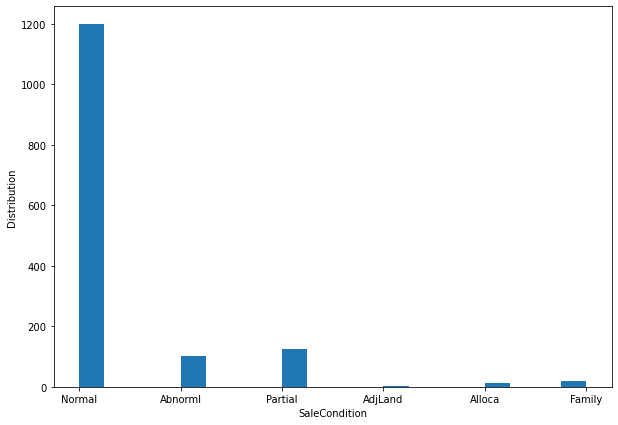

In [23]:
# plot SaleCondition
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df_train['SaleCondition'], bins=20)

# Adding extra features   
plt.xlabel("SaleCondition")
plt.ylabel("Distribution")
plt.savefig("org_sale_cond") # save pics

In [24]:
# STEP 2: use a one-hot encoding (OHE) to map categorical data to integers
df = pd.get_dummies(df,columns=['MSZoning', 'Street', 'Alley', 'RoofStyle', 'LandContour', 'Utilities',
                                          'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                                          'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                          'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature',
                                          'SaleType', 'SaleCondition'],drop_first=True)
print("The transform data using get_dummies")
df.head(10)

The transform data using get_dummies


,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,3,3,7,5,2003,2003,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,3,3,6,8,1976,1976,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,2,3,7,5,2001,2002,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,2,3,7,5,1915,1970,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,2,3,8,5,2000,2000,...,0,0,0,0,1,0,0,0,1,0
5,6,50,85.0,14115,2,3,5,5,1993,1995,...,0,0,0,0,1,0,0,0,1,0
6,7,20,75.0,10084,3,3,8,5,2004,2005,...,0,0,0,0,1,0,0,0,1,0
7,8,60,68.0,10382,2,3,7,6,1973,1973,...,0,0,0,0,1,0,0,0,1,0
8,9,50,51.0,6120,3,3,7,5,1931,1950,...,0,0,0,0,1,0,0,0,0,0
9,10,190,50.0,7420,3,3,5,6,1939,1950,...,0,0,0,0,1,0,0,0,1,0


I'll visualize the results of OHE by plotting feature histograms of the original feature and its new one-hot encoding. Here is the histogram of the new one-hot encoding of SaleCondition.

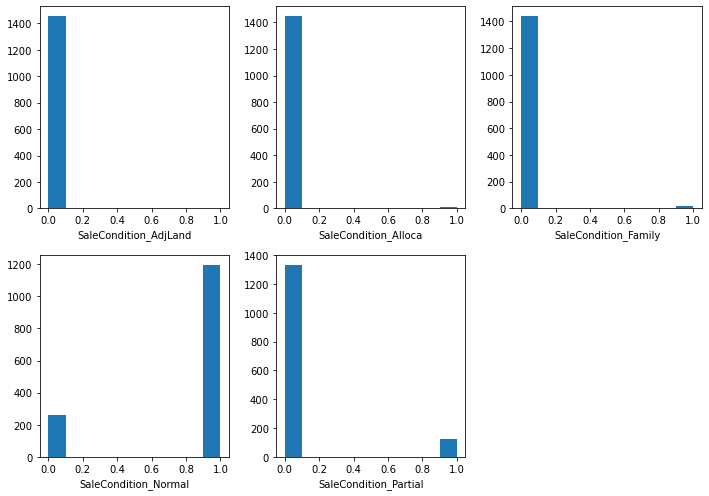

In [25]:
sale_cond_col = [col for col in df if col.startswith('SaleCondition')]
# plot data points 
# fig, axs = plt.subplots(2, 3, figsize=(50,10));

# for i in range(0, 2):
#     for j in range(0, 3):
#         axs[i][j].hist(df[sale_cond_col[i + j]]);
        
fig=plt.figure(figsize=(10,7))
for i in range(1, 6):
    fig.add_subplot(2, 3, i)
    plt.hist(df[sale_cond_col[i - 1]][:df_train.shape[0]], bins = 10)
    plt.xlabel(sale_cond_col[i - 1])
plt.tight_layout()
plt.show()
fig.savefig("ohe_sale_cond") # save pics

In [26]:
# check if there are any nulls
df.isnull().sum().sum()

0

### Organize Data
Split the dataframe into train and test. Get X_train, y_train, and X_test.

In [27]:
# merge data
df.shape

(2919, 206)

In [28]:
# get train set and test set
df_train = df.iloc[:len(df_train)]
df_train = df_train.join(target)
df_test = df.iloc[len(df_train):]

df_train.shape, df_test.shape

((1460, 207), (1459, 206))

In [29]:
df_train.tail(5)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
1455,1456,60,62.0,7917,3,3,6,5,1999,2000,...,0,0,0,1,0,0,0,1,0,175000
1456,1457,20,85.0,13175,3,3,6,6,1978,1988,...,0,0,0,1,0,0,0,1,0,210000
1457,1458,70,66.0,9042,3,3,7,9,1941,2006,...,0,0,0,1,0,0,0,1,0,266500
1458,1459,20,68.0,9717,3,3,5,6,1950,1996,...,0,0,0,1,0,0,0,1,0,142125
1459,1460,20,75.0,9937,3,3,5,6,1965,1965,...,0,0,0,1,0,0,0,1,0,147500


In [30]:
df_test.head(5)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,3,3,5,6,1961,1961,...,0,0,0,0,1,0,0,0,1,0
1461,1462,20,81.0,14267,2,3,6,6,1958,1958,...,0,0,0,0,1,0,0,0,1,0
1462,1463,60,74.0,13830,2,3,5,5,1997,1998,...,0,0,0,0,1,0,0,0,1,0
1463,1464,60,78.0,9978,2,3,6,6,1998,1998,...,0,0,0,0,1,0,0,0,1,0
1464,1465,120,43.0,5005,2,3,8,5,1992,1992,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# Get Xtrain, ytrain, and Xtest.
X_train  = df_train.drop(['SalePrice','Id'], axis=1)
X_train.shape, y_train.shape

((1460, 205), (1460,))

In [32]:
# remove duplicate columns
X_train = X_train.loc[:,~X_train.columns.duplicated()]

## Feature Selection
After one-hot encoding, there were more than 200 features. In order to avoid over fitting, feature selection would  be implemented. Here, I used Lasso Regression to filter out the least important features (with coef = 0) and keep the important ones. The process of feature selection kept 96 features and dropped the other 109 features.

In [33]:
#Define RMSE
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

#Lasso Regression
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
print("MIN_Value_LASSO:",rmse_cv(model_lasso).mean())

#Implemented feature selection 
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Keep" + str(sum(coef != 0)) + " features and dropped " +  str(sum(coef == 0)) + " features")

MIN_Value_LASSO: 0.1402124780892185
Keep96 features and dropped 109 features


In [34]:
coef

MSSubClass              -0.000739
LotFrontage             -0.000371
LotArea                  0.000002
LotShape                 0.002076
LandSlope               -0.000000
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca     0.000000
SaleCondition_Family    -0.000000
SaleCondition_Normal     0.057664
SaleCondition_Partial    0.000000
Length: 205, dtype: float64

Drop features that are filtered out by LASSO Regression.

In [35]:
droped_features = [];
for i in range(len(coef)):
    if coef[i] == 0:
        droped_features.append(X_train.columns[i])
droped_features

['LandSlope',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'GarageCond',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_NA',
 'Alley_Pave',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'LandContour_Low',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_Duplex',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofMatl_CompShg',
 'RoofMa

In [36]:
X_train.drop(droped_features, axis = 1, inplace=True)
X_train.shape

(1460, 96)

In [37]:
# Use test set for testing
X_test  = df_test.drop(['Id'], axis=1)
X_test.drop(droped_features, axis = 1, inplace=True)

## Modeling
I implemented OLS from scratch for modeling.

In [38]:
# Use ordinary least squares (OLS) for Modeling (build from scratch)
mat = pd.DataFrame(np.linalg.pinv(np.matrix(X_train.T.dot(X_train))))
theta_best = pd.DataFrame(mat.values.dot(X_train.T).dot(y_train))
theta_best
arr_d = (np.asarray(theta_best)).flatten()

In [39]:
# TEST USE ONLY!! To see if the OLS is accurate
# model = sm.OLS(y_train,X_train)
# results = model.fit()
# results.params

## Evaluate Predictions on Training set
Generate predictions on the training set and evaluate predictions on the training set using the MSE and the R^2 score.

In [40]:
# generate predictions on the training set
y_train_pred = X_train.dot(arr_d)

In [41]:
# Evaluate predictions on the training set using the MSE and the R^2 score
print('MSE:', metrics.mean_squared_error(y_train, y_train_pred))
print('R^2:', metrics.r2_score(y_train, y_train_pred))

MSE: 0.013690668658049349
R^2: 0.9141384048093214


## Prediction
Use the regression model to predict the sale price with the test set. Take the exp of the sale price since the log of sale price are used for modeling.

In [42]:
# generate predictions
y_test_pred = X_test.dot(arr_d)
y_test_pred.head()

1460    11.667795
1461    11.938870
1462    12.060132
1463    12.189989
1464    12.236373
dtype: float64

In [43]:
# take the exp of the sale price
y_test_pred_exp = np.exp(y_test_pred)
submission_predictions = pd.Series(y_test_pred_exp).array
submission_predictions

<PandasArray>
[116750.60356745534, 153103.52389102234,  172841.7765631419,
 196808.99206141225, 206152.86806218512,  170969.4677353887,
  178922.7435137021, 166962.20418188442,  193461.6248612767,
 124127.97807216478,
 ...
  76432.49331075362,  83373.44756965591, 152376.71553463474,
  76226.08860493294,  73134.93875677165,  79941.22128054843,
  80948.73522353297, 155944.97756114017, 107948.37750916783,
 223112.71753452593]
Length: 1459, dtype: float64

In [44]:
# save data
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = df_test.index + 1
res['SalePrice'] = submission_predictions
res.to_csv('submission1.csv',index=False)